#   Average Cost of Living  in United States of America (Machine Learning Project)

## Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Reading the csv file with help of pandas read_csv()


Here We have the dataset of cost of living in the states of america, we can see that there is Year,State, Type, Length, Expense and Value the description of each columns is as follows 
- Year : The Digest year this information comes from
- State : The U.S. State
- Type : Type of University, Private or Public and in-state or out-of-state. Private colleges charge the same for in/out of          state
- Length : Whether the college mainly offers 2-year (Associates) or 4-year (Bachelors) programs
- Expense : The Expense being described, tuition/fees or on-campus living expenses
- Value : The average cost for this particular expense, in USD ($)

In [3]:
df = pd.read_csv("col.csv")
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


- Following code describes the total number of rows and columns in the dataset
There are **3548** Rows and **6** Columns 

In [4]:
df.shape


(3548, 6)

- Here we are grouping the data on the basis of State column in the data set 
We can see that the number of different states in the data set

In [5]:
df.groupby("State")["State"].agg("count").head(10)

State
Alabama                 71
Alaska                  63
Arizona                 71
Arkansas                71
California              71
Colorado                71
Connecticut             71
Delaware                61
District of Columbia    35
Florida                 71
Name: State, dtype: int64

## Cleaning the dataset 

- Now lets check if there is any null values in the data set by applying the **isnull()**
- We an see that there is no null values in the dataset that means the data set is already cleaned and is ready to use.

In [7]:
df.isnull().sum()

Year       0
State      0
Type       0
Length     0
Expense    0
Value      0
dtype: int64


- Here We are making the new column named Expenses by splitting the value of the Expense column We are just keeping the 
  Fees and Room in the column for better understanding. 


In [12]:
new = df["Expense"].str.split("/", n = 1, expand = True)
 
# making separate first name column from new data frame
df["Expenses"]= new[0]

new.head()

,0,1
0,Fees,Tuition
1,Room,Board
2,Fees,Tuition
3,Fees,Tuition
4,Room,Board


In [13]:
df.head()

,Year,State,Type,Length,Expense,Value,Expenses
0,2013,Alabama,Private,4-year,Fees/Tuition,13983,Fees
1,2013,Alabama,Private,4-year,Room/Board,8503,Room
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048,Fees
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073,Fees
4,2013,Alabama,Public In-State,4-year,Room/Board,8473,Room


- After Splitting the Columns we are dropping the Expense column from the data set 

In [14]:
df1 = df.drop(['Expense'], axis=1)


In [15]:
df1.head()

,Year,State,Type,Length,Value,Expenses
0,2013,Alabama,Private,4-year,13983,Fees
1,2013,Alabama,Private,4-year,8503,Room
2,2013,Alabama,Public In-State,2-year,4048,Fees
3,2013,Alabama,Public In-State,4-year,8073,Fees
4,2013,Alabama,Public In-State,4-year,8473,Room


- Here We are making the new column named **Period** by splitting the value of the Length column We are just keeping the 
  4 and 2,  values of column for better understanding. 

In [16]:
new = df1["Length"].str.split("-", n = 1, expand = True)
 
# making separate first name column from new data frame
df1["Period"]= new[0]

new.head()

,0,1
0,4,year
1,4,year
2,2,year
3,4,year
4,4,year


In [17]:
df1.head()

,Year,State,Type,Length,Value,Expenses,Period
0,2013,Alabama,Private,4-year,13983,Fees,4
1,2013,Alabama,Private,4-year,8503,Room,4
2,2013,Alabama,Public In-State,2-year,4048,Fees,2
3,2013,Alabama,Public In-State,4-year,8073,Fees,4
4,2013,Alabama,Public In-State,4-year,8473,Room,4


- dropping the Length Column

In [18]:
df2 = df1.drop(['Length'], axis=1)

- Starting 10 values of the data set 

In [19]:
df2.head(10)

,Year,State,Type,Value,Expenses,Period
0,2013,Alabama,Private,13983,Fees,4
1,2013,Alabama,Private,8503,Room,4
2,2013,Alabama,Public In-State,4048,Fees,2
3,2013,Alabama,Public In-State,8073,Fees,4
4,2013,Alabama,Public In-State,8473,Room,4
5,2013,Alabama,Public Out-of-State,7736,Fees,2
6,2013,Alabama,Public Out-of-State,20380,Fees,4
7,2013,Alabama,Public Out-of-State,8473,Room,4
8,2013,Alaska,Private,21496,Fees,4
9,2013,Alaska,Private,8923,Room,4


In [20]:
df2.shape


(3548, 6)

## Data Visualization

- In the following visualization we can see that the there are higher number of the Fees values then Rooms in the data set
- There are **2198** Fees and **1350** Rooms

In [28]:
(df2['Expenses'] == "Fees").sum()

2198

In [29]:
(df2['Expenses'] == "Room").sum()

1350

Text(0, 0.5, 'Count')

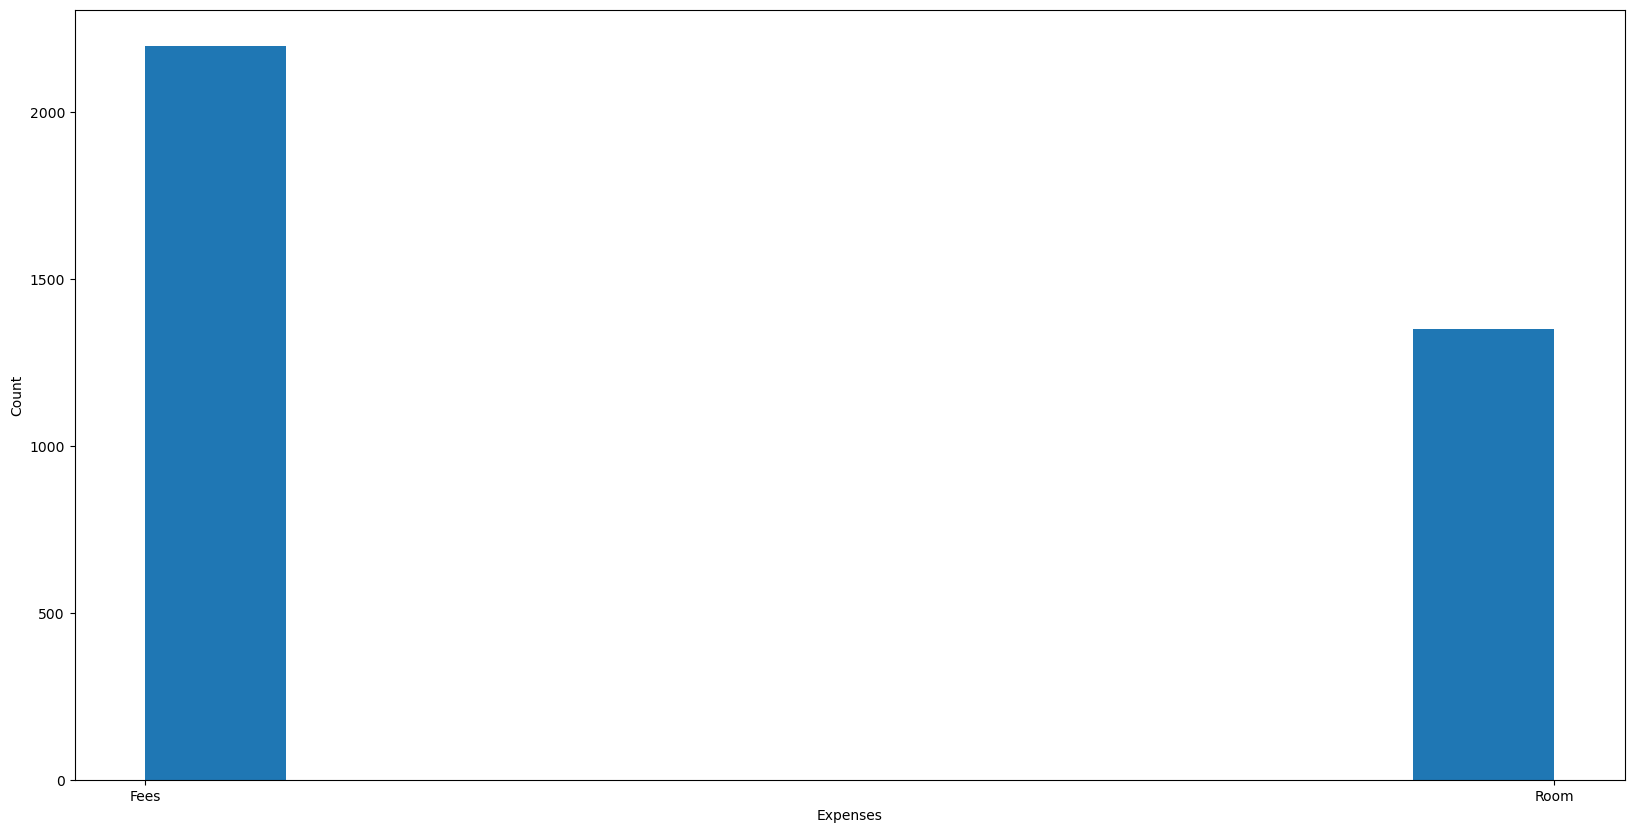

In [21]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.Expenses)
plt.xlabel("Expenses")
plt.ylabel("Count")

- In the following visualization we can see that the there are higher number of the 4 year values then 2 year in the data set
- Here we can see that there are **2672 values of 4 year** and **876 values of 2 year**

In [32]:
(df2['Period'] == "4").sum()

2672

In [33]:
(df2['Period'] == "2").sum()

876

Text(0, 0.5, 'Count')

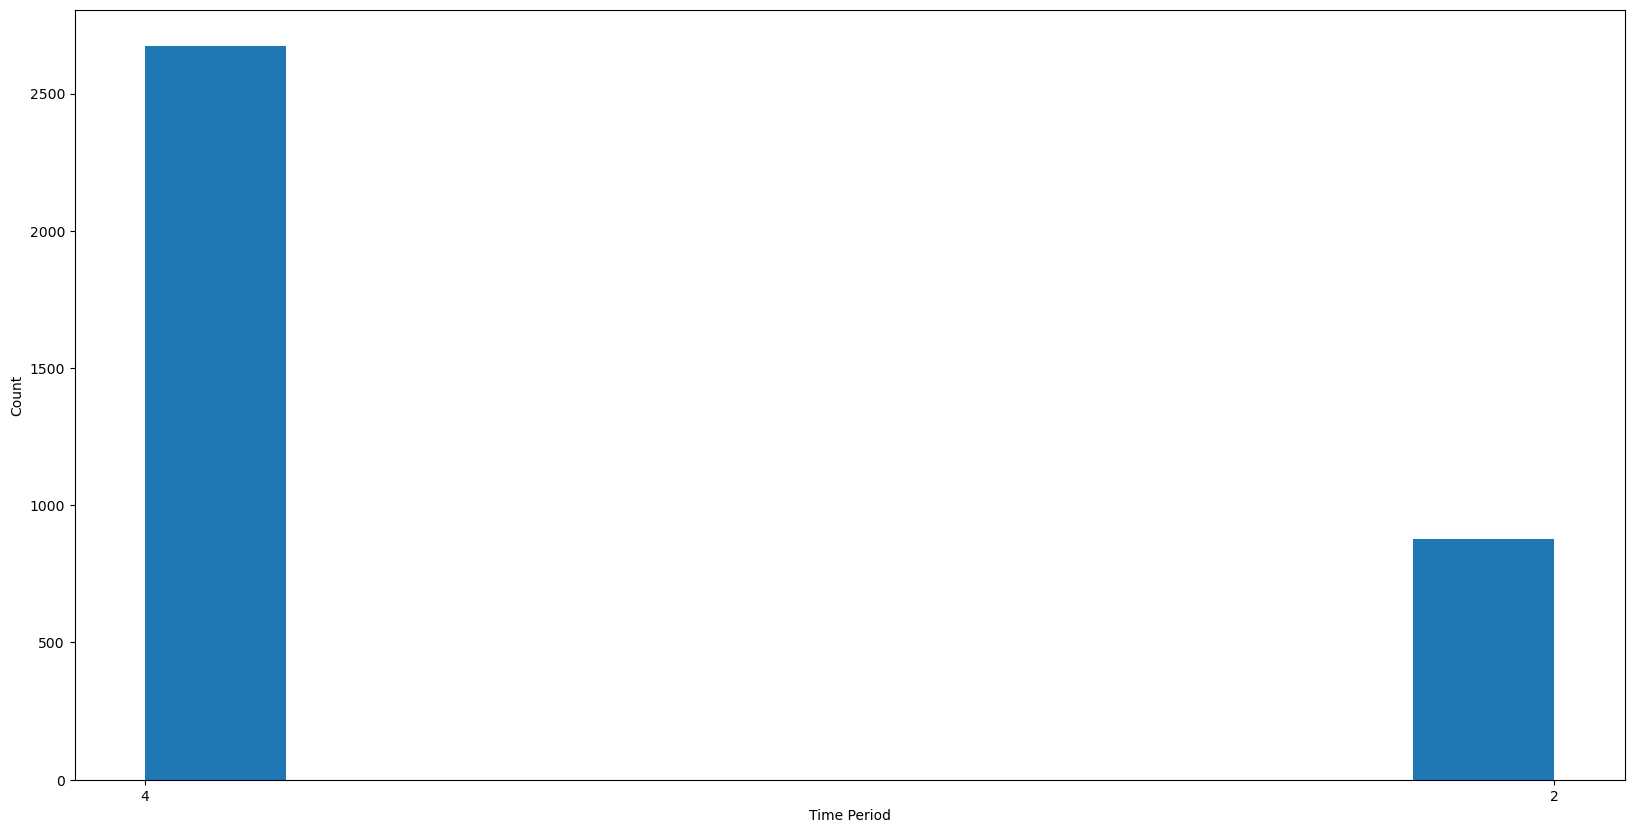

In [16]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.Period)
plt.xlabel("Time Period")
plt.ylabel("Count")

- In the following visualization we can see that the there are higher number of the Public-Out-of-State Universities 
- Here we can see that there are **1347 Public-Out-of-State Universities **.

In [36]:
(df2['Type'] == "Private").sum()

905

In [39]:
(df2['Type'] == "Public In-State").sum()

1296

In [40]:
(df2['Type'] == "Public Out-of-State").sum()

1347

Text(0, 0.5, 'Count')

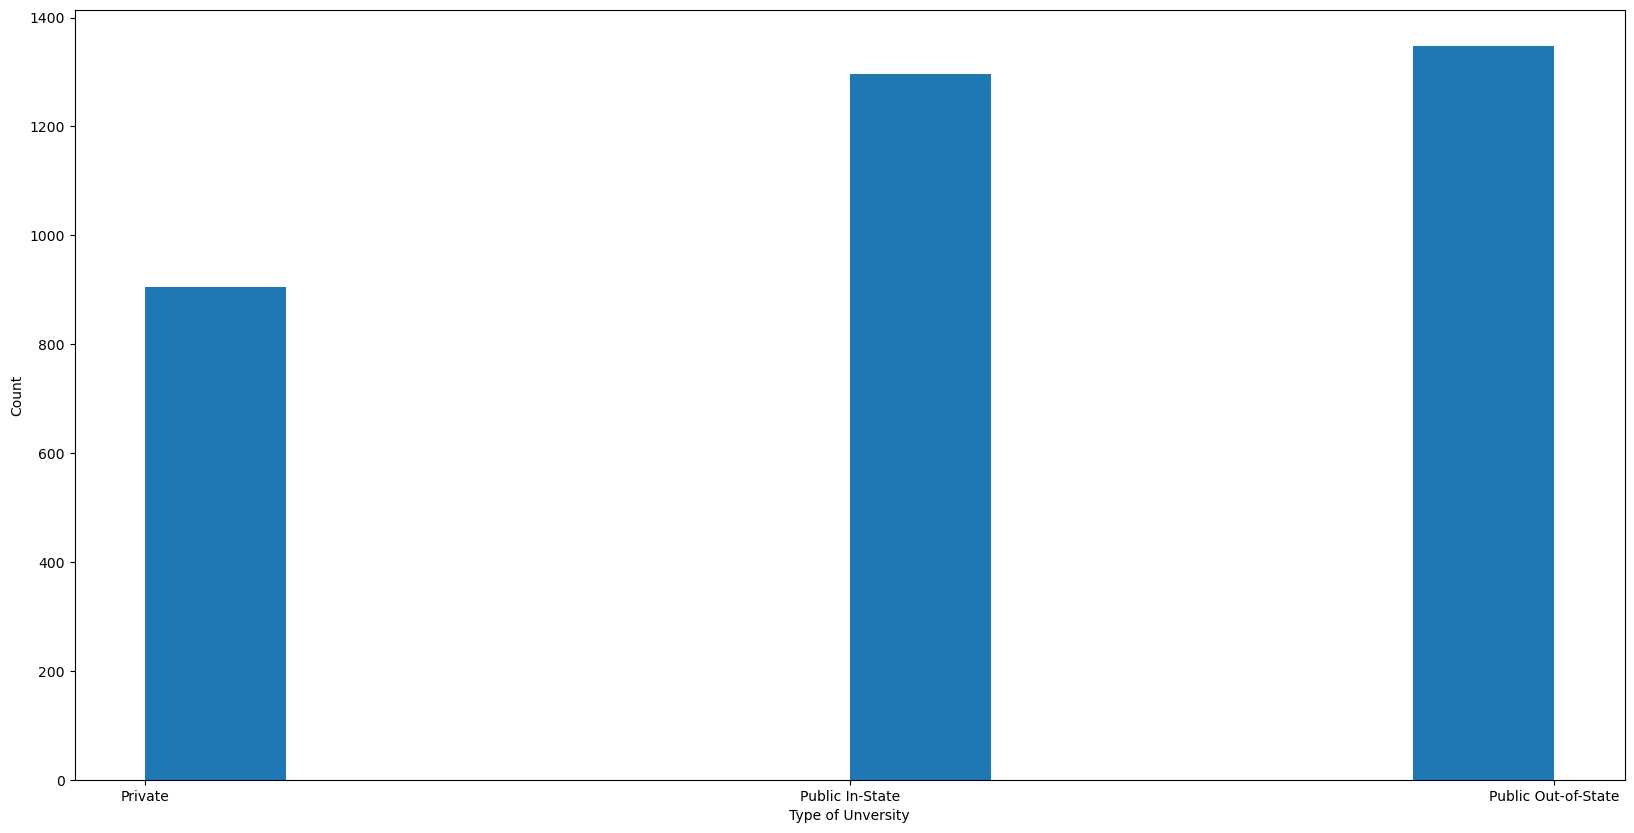

In [17]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.Type)
plt.xlabel("Type of Unversity")
plt.ylabel("Count")

- Here in these visualizatio we can see that the cost or total cost of living is maximum in the range between  
  ** $ 7000-15000**

Text(0, 0.5, 'Count')

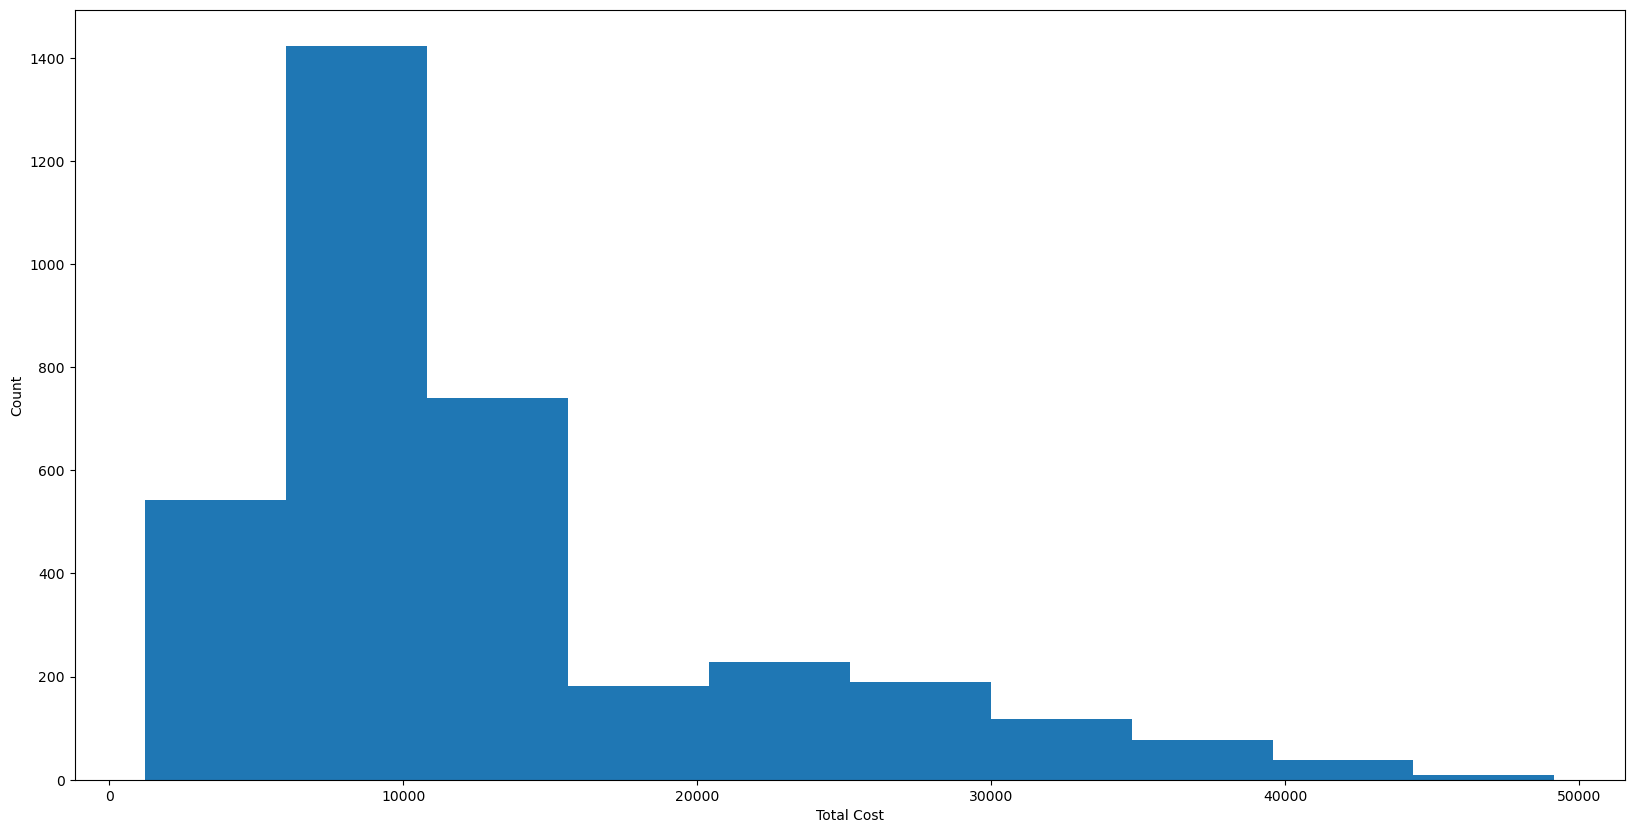

In [18]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.Value)
plt.xlabel("Total Cost")
plt.ylabel("Count")

-  Based on the above given data we have to find the cost of living based on the state year type of university, period ,      expenses
- here the target is values which is cost of living 

In [34]:
inputs = df.drop('Value',axis = 'columns')
target = df['Value']

In [35]:
target

0       13983
1        8503
2        4048
3        8073
4        8473
        ...  
3543     3987
3544     9799
3545     9820
3546    14710
3547     9799
Name: Value, Length: 3548, dtype: int64

## Machine Learning Model

- Here we are applying the Decision Tree model for the prediction of the price b ased on given inputs 

In [36]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le_state = LabelEncoder()
le_type = LabelEncoder()
le_expenses = LabelEncoder()
le_period = LabelEncoder()

In [58]:
inputs['state_n'] = le_state.fit_transform(inputs['State'])
inputs['type_n'] = le_state.fit_transform(inputs['Type'])
inputs['expenses_n'] = le_state.fit_transform(inputs['Expenses'])
inputs['period_n'] = le_state.fit_transform(inputs['Length'])
inputs['year_n'] = le_state.fit_transform(inputs['Year'])


In [89]:
inputs_n = inputs.drop(['State','Type','Expenses','Length','Expense','Year'],axis = 'columns')
inputs_n.head(50)

,state_n,type_n,expenses_n,period_n,year_n
0,0,0,0,1,0
1,0,0,1,1,0
2,0,1,0,0,0
3,0,1,0,1,0
4,0,1,1,1,0
5,0,2,0,0,0
6,0,2,0,1,0
7,0,2,1,1,0
8,1,0,0,1,0
9,1,0,1,1,0


In [90]:
df2.head(50)

,Year,State,Type,Value,Expenses,Period
0,2013,Alabama,Private,13983,Fees,4
1,2013,Alabama,Private,8503,Room,4
2,2013,Alabama,Public In-State,4048,Fees,2
3,2013,Alabama,Public In-State,8073,Fees,4
4,2013,Alabama,Public In-State,8473,Room,4
5,2013,Alabama,Public Out-of-State,7736,Fees,2
6,2013,Alabama,Public Out-of-State,20380,Fees,4
7,2013,Alabama,Public Out-of-State,8473,Room,4
8,2013,Alaska,Private,21496,Fees,4
9,2013,Alaska,Private,8923,Room,4


In [94]:
inputs_n.tail(100)

,state_n,type_n,expenses_n,period_n,year_n
3448,36,1,1,1,8
3449,36,2,0,0,8
3450,36,2,0,1,8
3451,36,2,1,1,8
3452,37,0,0,1,8
...,...,...,...,...,...
3543,50,1,0,0,8
3544,50,1,1,1,8
3545,50,2,0,0,8
3546,50,2,0,1,8


In [95]:
df2.tail(100)

,Year,State,Type,Value,Expenses,Period
3448,2021,Oklahoma,Public In-State,9219,Room,4
3449,2021,Oklahoma,Public Out-of-State,9320,Fees,2
3450,2021,Oklahoma,Public Out-of-State,21737,Fees,4
3451,2021,Oklahoma,Public Out-of-State,9219,Room,4
3452,2021,Oregon,Private,45166,Fees,4
...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,3987,Fees,2
3544,2021,Wyoming,Public In-State,9799,Room,4
3545,2021,Wyoming,Public Out-of-State,9820,Fees,2
3546,2021,Wyoming,Public Out-of-State,14710,Fees,4


In [80]:
from sklearn import tree

In [81]:
model = tree.DecisionTreeClassifier()

In [82]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

- Here the score of the model is 1.0 which is pretty nice for the prediction 

In [83]:
model.score(inputs_n,target)

1.0

- Now lets check our model 
- lets take State = 2021  ,Year = Wyoming, University= Public In-State,Expense = Fees,Period = 2
  the cost is 3987
  the prediction is 3987 which is correct 

## Checking the Prediction of the Model

In [86]:
model.predict([[50,1,0,0,8]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3987], dtype=int64)

 
- lets take State = Oklahoma  ,Year = 2021, University= Public In-State,Expense = Room,Period = 4   
  the cost is 9219
  the prediction is 9219 which is correct 

In [87]:
model.predict([[36,1,1,1,8]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([9219], dtype=int64)

- lets take State = Oregon  ,Year = 2021, University= Private,Expense = Fees,Period = 4  
    
  the cost is 45166
  the prediction is 45166 which is correct 

In [88]:
model.predict([[37,0,0,1,8]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([45166], dtype=int64)

2013	Colorado	Public Out-of-State	10396	Room	4
- lets take State = Colorado  ,Year = 2013, University= Public Out-of State,Expense = Room,Period = 4      
  the cost is 10396
  the prediction is 10396 which is correct 

In [91]:
model.predict([[5,2,1,1,0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([10396], dtype=int64)